In [4]:
import os
import sys
import numpy as np
import pylab as pl

from   astropy.table import Table

In [6]:
sys.path.append(os.environ['HOME'] + '/DESI/')

In [7]:
import pubplot

from   findfile import findfile
from   surface_brightness import petro_radius, petro_flux, sersic, petro_ratio

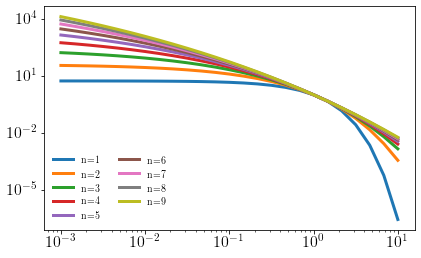

In [8]:
for n in np.arange(1, 10, 1):
    rs  = np.logspace(-3., 1., 25)
    Fs  = sersic(rs, n=n, half_light=1.)
    
    pl.loglog(rs, Fs, label=f'n={n}')

pl.legend(loc=3, frameon=False, ncol=2)

8.3058899554872e-05 2.114


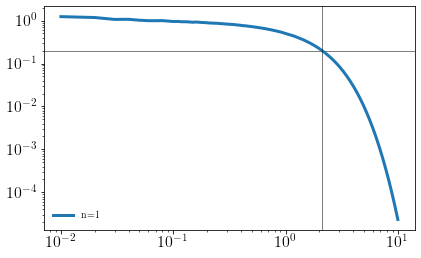

In [9]:
pl.axhline(0.2, c='k', lw=0.5)

for n in np.arange(1, 10, 1):
    dr  = 1.e-2 
    rs  = np.arange(dr, 10., dr)
    Rs  = petro_ratio(rs, n, half_light=1.)
    
    pl.loglog(rs, Rs, label=f'n={n}')
    
    diff, rad = petro_radius(n, half_light=1.)
        
    pl.axvline(rad, c='k', lw=0.5)
    
    print(diff, rad)
    
    break
    
pl.legend(loc=3, frameon=False, ncol=2)

In [10]:
gold = Table.read(findfile('gold', survey='desi'))
sorted(gold.dtype.names)

['BGS_TARGET',
 'BITWEIGHTS',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CATAID',
 'CHI2',
 'COADD_EXPTIME',
 'COADD_FIBERSTATUS',
 'COADD_NUMEXP',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE',
 'COEFF',
 'COMP_TILE',
 'DEC',
 'DELTACHI2',
 'DESI_TARGET',
 'DETMAG',
 'DISTMOD',
 'EBV',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FIELD',
 'FLUX_G',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_Z',
 'FLUX_R',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_Z',
 'FRACZ_TILELOCID',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAMA_FIELD',
 'GAMA_SEP',
 'GMAG_DRED',
 'GMAG_DRED_SDSS',
 'GMR',
 'GOOD_MATCH',
 'GOOD_Z',
 'IMAG_DRED_SDSS',
 'IN_CLUSTERING',
 'IN_FULL',
 'IN_GOLD',
 'LOCATION_ASSIGNED',
 'LUMDIST',
 'MASKBITS',
 'MEAN_DELTA_X',
 'MEAN_DELTA_Y',
 'MEAN_FIBER_DEC',
 'MEAN_FIBER_RA',
 'MEAN_PSF_TO_FIBER_SP

Text(0.5, 0, 'SERSIC N')

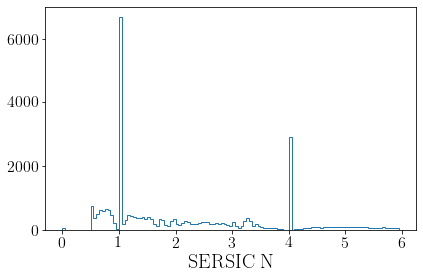

In [11]:
_ = pl.hist(gold['SERSIC'], bins=np.arange(0.0, 6.0, 0.05), histtype='step')
pl.xlabel('SERSIC N')

Text(0.5, 0, 'Half light radius [arcsec]')

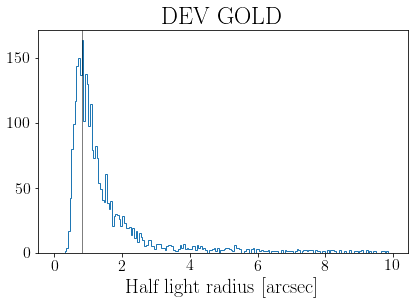

In [12]:
isdev = gold['MORPHTYPE'] == 'DEV'
_     = pl.hist(gold['SHAPE_R'][isdev], bins=np.arange(0.0, 10.0, 0.05), histtype='step')

pl.axvline(0.8, c='k', lw=0.5)

pl.title('DEV GOLD')
pl.xlabel('Half light radius [arcsec]')

Text(0.5, 0, 'Half light radius [arcsec]')

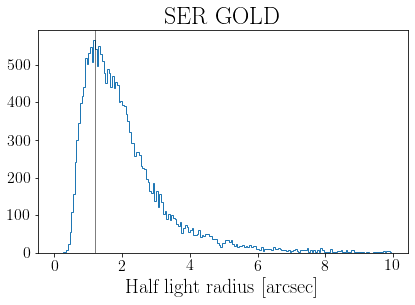

In [13]:
isser = gold['MORPHTYPE'] == 'SER'
_     = pl.hist(gold['SHAPE_R'][isser], bins=np.arange(0.0, 10.0, 0.05), histtype='step')

pl.axvline(1.2, c='k', lw=0.5)

pl.title('SER GOLD')
pl.xlabel('Half light radius [arcsec]')

Text(0.5, 0, 'E1')

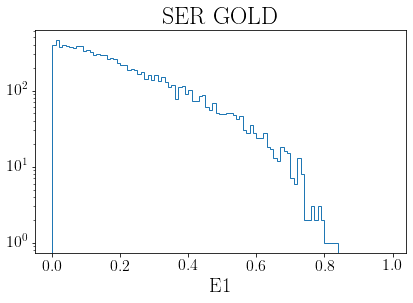

In [14]:
isser = gold['MORPHTYPE'] == 'SER'
_     = pl.hist(gold['SHAPE_E1'][isser], bins=np.arange(0.0, 1.0, 1.e-2), histtype='step')

pl.yscale('log')
pl.title('SER GOLD')
pl.xlabel('E1')

Text(0.5, 0, 'E2')

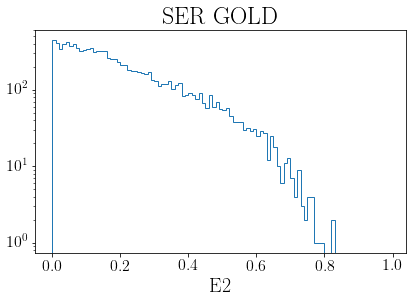

In [15]:
isser = gold['MORPHTYPE'] == 'SER'
_     = pl.hist(gold['SHAPE_E2'][isser], bins=np.arange(0.0, 1.0, 1.e-2), histtype='step')

pl.yscale('log')
pl.title('SER GOLD')
pl.xlabel('E2')

In [16]:
np.median(gold['SHAPE_R'][isdev])

1.0642667

1.000000e-01	7.716271e-01	2.814813e-01
3.000000e-01	7.679643e-01	2.866474e-01
5.000000e-01	7.666636e-01	2.884879e-01
7.000000e-01	7.659082e-01	2.895581e-01
9.000000e-01	7.659270e-01	2.895315e-01
1.100000e+00	7.655768e-01	2.900280e-01
1.300000e+00	7.656399e-01	2.899386e-01
1.000000e-01	7.959635e-01	2.477672e-01
3.000000e-01	7.931901e-01	2.515567e-01
5.000000e-01	7.918631e-01	2.533748e-01
7.000000e-01	7.911095e-01	2.544086e-01
9.000000e-01	7.912428e-01	2.542255e-01
1.100000e+00	7.909869e-01	2.545768e-01
1.300000e+00	7.908092e-01	2.548207e-01
1.000000e-01	8.257063e-01	2.079360e-01
3.000000e-01	8.200526e-01	2.153958e-01
5.000000e-01	8.188754e-01	2.169554e-01
7.000000e-01	8.188644e-01	2.169700e-01
9.000000e-01	8.189867e-01	2.168079e-01
1.100000e+00	8.186416e-01	2.172655e-01
1.300000e+00	8.186708e-01	2.172267e-01
1.000000e-01	8.540937e-01	1.712362e-01
3.000000e-01	8.491706e-01	1.775126e-01
5.000000e-01	8.490027e-01	1.777273e-01
7.000000e-01	8.484735e-01	1.784043e-01
9.000000e-01	8.485339e-01

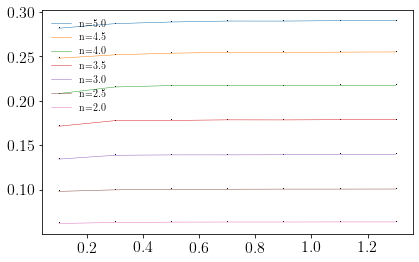

In [17]:
half_lights = np.arange(0.1, 1.5, 0.2)

for n in np.arange(5., 1.5, -0.5):
    result      = []
    
    for half_light in half_lights:
        pF = petro_flux(n=n, half_light=half_light)
        dm = -2.5 * np.log10(pF)
    
        print('{:.6e}\t{:.6e}\t{:.6e}'.format(half_light, pF, dm))
    
        pl.plot(half_light, dm, marker=',', c='k')
    
        result.append([half_light, pF, dm])
    
    result = np.array(result)

    pl.plot(result[:,0], result[:,2], lw=0.5, label=f'n={n}')
    
pl.legend(frameon=False, loc=2)

# Done.